# Check PFT config

Problems with the input PFT config. Try to run different simul.

In [60]:
import numpy as np
import xarray as xr; xr.set_options(display_style='html', keep_attrs=True)
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from dataset_manipulation import *

## Import

### – Surfdatamap input - original, no edit

In [61]:
fn_in='surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304'
fn = '../../data/surfdatamap/'+fn_in + '.nc'
dset_in = xr.open_dataset(fn)
dset_in = convert_lsmcoord(dset_in)
dset_in = convert360_180(dset_in)
lnd_frac=dset_in.LANDFRAC_PFT
pfts2000_noedit = dset_in.PCT_NAT_PFT

### – Surfdatamap input - edited

In [62]:
fn = '../../processed-data/input/IDEALIZED/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304_edited.nc'
dset_in = xr.open_dataset(fn)
dset_in = convert_lsmcoord(dset_in)
dset_in = convert360_180(dset_in)
pfts2000_edit = dset_in.PCT_NAT_PFT

### – Lnd output - original initial file (last year: 2012)

In [103]:
raw_path = '../../../archive/'
casename = 'IDEAL-ON_init_2000_sec_nudg_f19_f19'
comp = 'lnd'; model='clm2'
fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.h0.2012-12.nc' #last file
ds_init = xr.open_dataset(fp)
ds_init = convert360_180(ds_init)
pfts2012_i = ds_init.PCT_NAT_PFT#.isel(time=-1)
iso_i = ds_init.MEG_isoprene
mono_i = ds_init.MEG_carene_3
for var in ['MEG_limonene', 'MEG_myrcene', 'MEG_ocimene_t_b', 'MEG_pinene_a', 
                 'MEG_pinene_b', 'MEG_sabinene']:
    mono_i = mono_i + ds_init[var]

### – Lnd output - initial file from CTRL (last year: 2012)

In [104]:
casename = 'IDEAL-ON_2000_sec_nudg_f19_f19'
fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.h0.2012-12.nc' #last file
ds = xr.open_dataset(fp)
ds = convert360_180(ds)
pfts2012 = ds.PCT_NAT_PFT#.isel(time=-1)
iso = ds.MEG_isoprene
mono = ds.MEG_carene_3
for var in ['MEG_limonene', 'MEG_myrcene', 'MEG_ocimene_t_b', 'MEG_pinene_a', 
                 'MEG_pinene_b', 'MEG_sabinene']:
    mono = mono + ds[var]

## First check on different initial files on the output

In [90]:
if (pfts2012_i==pfts2012).where(pfts2012_i.notnull()).min().values == 1.: print('Identical')

Identical


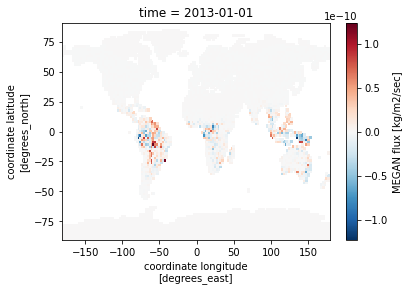

In [106]:
(iso_i - iso).plot()

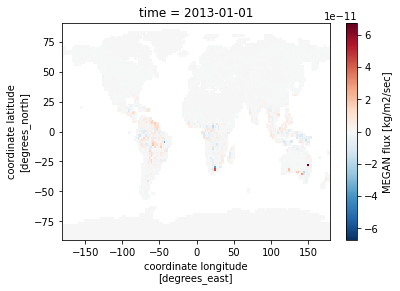

In [105]:
(mono_i - mono).plot()

Differences in BVOC emissions, but not in the configuration... what is the configuration? edited or original?

## Check on PFT configuration

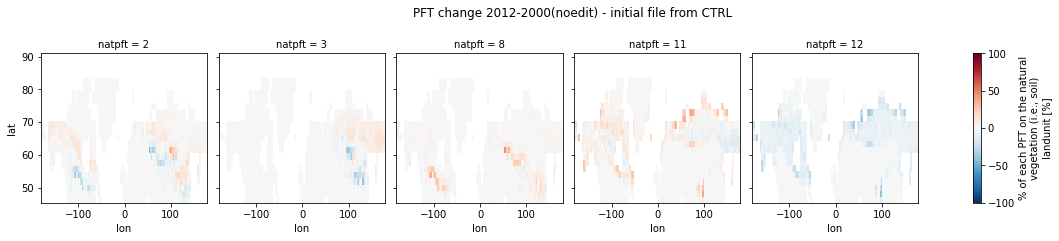

max ∆: 45.89322960243228


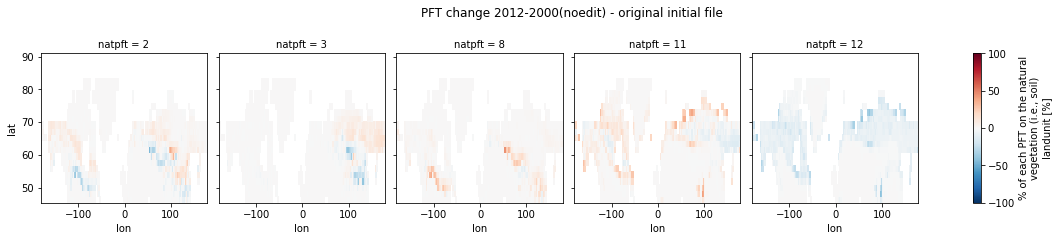

max ∆: 45.89322960243228

Difference in initial files does not change the PFT config (as expected)


In [171]:
pfts20122 = pfts2012.interp_like(pfts2000_noedit)
diff = (pfts20122-pfts2000_noedit)
diff.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100); 
plt.suptitle('PFT change 2012-2000(noedit) - initial file from CTRL', y=1.1); plt.show()
print('max ∆:', diff.max().values)

pfts2012_i2 = pfts2012_i.interp_like(pfts2000_noedit)
diff_i =(pfts2012_i2-pfts2000_noedit)
diff_i.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100)
plt.suptitle('PFT change 2012-2000(noedit) - original initial file', y=1.1); plt.show()
print('max ∆:', diff.max().values)

if abs(diff -diff_i).max() == 0.: 
    print("\nDifference in initial files does not change the PFT config (as expected)")

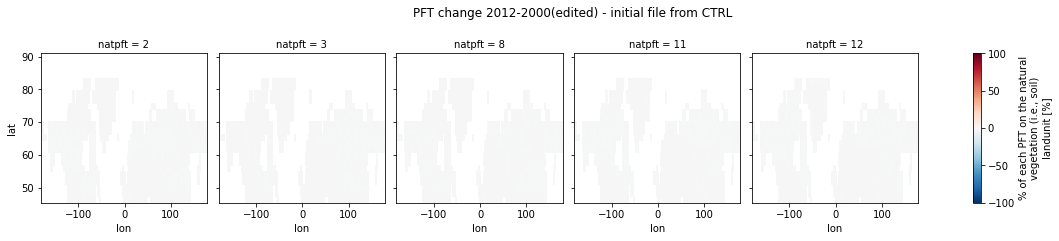

max ∆: 4.035882739117369e-12


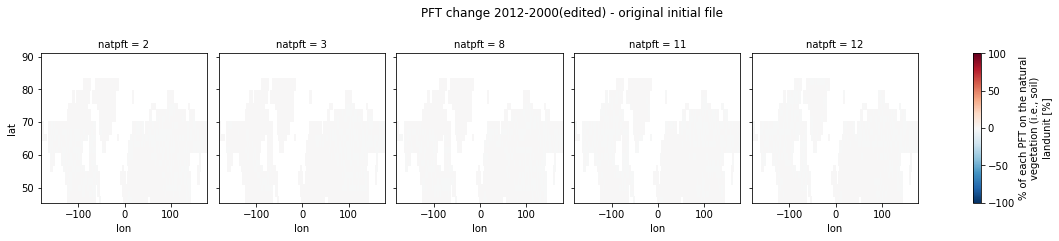

max ∆: 4.035882739117369e-12

Difference in initial files does not change the PFT config (as expected)


In [172]:
pfts20122 = pfts2012.interp_like(pfts2000_edit)
diff = (pfts20122-pfts2000_edit)
diff.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100); 
plt.suptitle('PFT change 2012-2000(edited) - initial file from CTRL', y=1.1); plt.show()

print('max ∆:', diff.max().values)

pfts2012_i2 = pfts2012_i.interp_like(pfts2000_edit)
diff_i =(pfts2012_i2-pfts2000_edit)
diff_i.sel(natpft=[2,3,8,11,12]).where(pfts20122.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100)
plt.suptitle('PFT change 2012-2000(edited) - original initial file', y=1.1); plt.show()
print('max ∆:', diff_i.max().values)

if abs(diff -diff_i).max() == 0.: 
    print("\nDifference in initial files does not change the PFT config (as expected)")

Configuration of PFT looks rightly edited

## Check BVOC as timeseries

In [169]:
"""raw_path = '../../../archive/'
casename = 'IDEAL-ON_init_2000_sec_nudg_f19_f19'

ds_i = create_dataset(raw_path, casename, 'atm')
ds_i = convert360_180(ds_i)

casename = 'IDEAL-ON_2000_sec_nudg_f19_f19'

ds = create_dataset(raw_path, casename, 'atm')
ds = convert360_180(ds)
"""
processed_path = '../../processed-data/output/'
"""
variables = ['LANDFRAC', 'GRIDAREA','SFisoprene','SFmonoterp']
ds_i[variables].to_netcdf(processed_path+'ds_init.nc')
ds[variables].to_netcdf(processed_path+'ds.nc')"""

ds = xr.open_dataset(processed_path+'ds.nc')
ds_i = xr.open_dataset(processed_path+'ds.nc')
lndfrac= ds.LANDFRAC.isel(time=0).drop('time')

Files found
Dataset created
Postprocessing completed


<xarray.Dataset>
Dimensions:           (ilev: 33, lat: 96, lev: 32, lon: 144, nbnd: 2, time: 60)
Coordinates:
  * lat               (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time              (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Dimensions without coordinates: nbnd
Data variables:
    LANDFRAC          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    GRIDAREA          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    gw                (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    date              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds         (time, nbnd) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    SFisoprene        (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SFmonoterp        (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    N_AER             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    DOD550            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOA_A1            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    SOA_NA            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    cb_SOA_A1         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_NA         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_A1_OCW     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    cb_SOA_NA_OCW     (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ACTNL             (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ACTREL            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CDNUMC            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDHGH            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDLOW            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDMED            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDTOT            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDLIQ            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    CLOUD             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    CLOUDCOVER_CLUBB  (time, ilev, lat, lon) float32 dask.array<chunksize=(1, 33, 96, 144), meta=np.ndarray>
    FCTL              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NUMLIQ            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    TGCLDLWP          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNT_DRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNTCDRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNTCDRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNT_DRF          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    LWCF              (time, lat, lon) float32 da

In [ ]:
processed_path = '../../processed-data/output/'
variables = ['LANDFRAC', 'GRIDAREA','SFisoprene','SFmonoterp']
ds_i[variables].to_netcdf(processed_path+'ds_init.nc')
ds[variables].to_netcdf(processed_path+'ds.nc')

In [219]:
iso_init = ds_i.SFmonoterp.where(lndfrac>0.)
iso_ctrl = ds.SFmonoterp.where(lndfrac>0.)

In [220]:
def plot_trend(ds):
    ds.where(ds.lat>45., drop=True).mean('lat').mean('lon').plot()
    ds.where(ds.lat>45., drop=True).mean('lat').mean('lon').chunk({'time': None}).rolling(time=12).mean().plot()

    out = iso_ctrl.polyfit(dim='time', deg=1, full=True)
    polyfit = xr.polyval(coord=ds['time'], coeffs=out.polyfit_coefficients)
    polyfit.where(ds.lat>45., drop=True).mean('lat').mean('lon').plot()
    
    
def plot_map_trend(ds):
    coeff = ds.polyfit(dim='time', deg=1, full=True).polyfit_coefficients.sel(degree=1)
    coeff.where(lndfrac>0.).where(ds.lat >45., drop=True).plot()

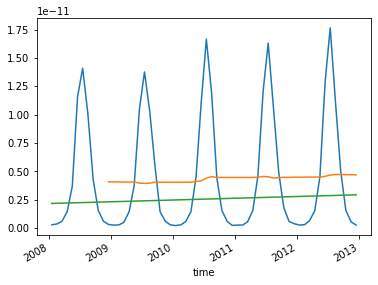

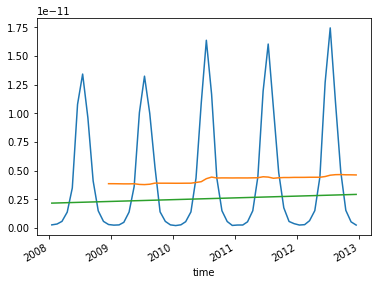

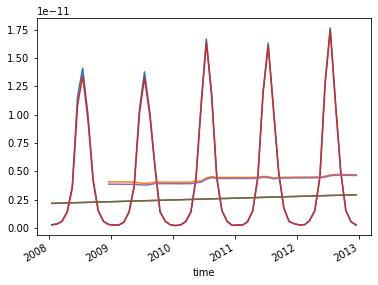

In [221]:
plot_trend(iso_ctrl); plt.show()
plot_trend(iso_init); plt.show()
plot_trend(iso_ctrl)
plot_trend(iso_init)

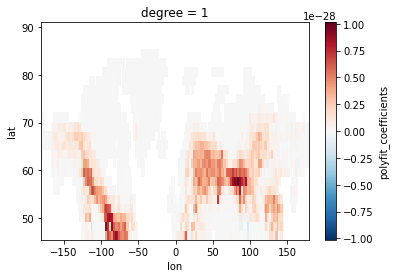

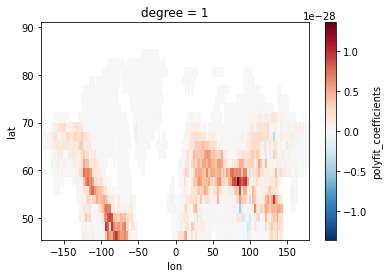

In [222]:
plot_map_trend(iso_ctrl); plt.show()
plot_map_trend(iso_init); plt.show()

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


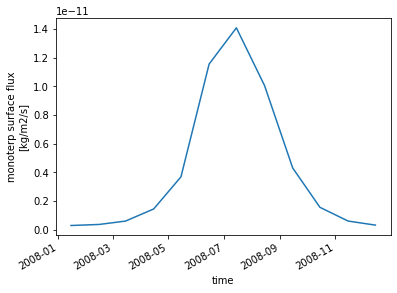

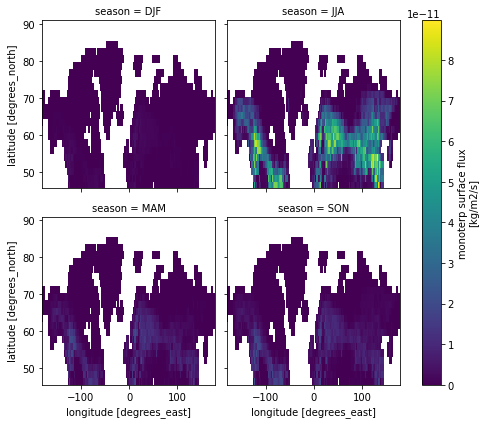

In [235]:
iso_ctrl.isel(time=slice(0,12)).where(ds.lat>45., drop=True).mean('lat').mean('lon').plot()
ds_unweighted = iso_ctrl.groupby("time.season").mean("time")
ds_unweighted.where(ds_unweighted.lat>45., drop=True).plot(col='season', col_wrap=2)

In [251]:
iso_ctrl.groupby('time.season').mean('lat').mean('lon')#.plot()

<xarray.DataArray 'SFmonoterp' (time: 60)>
dask.array<mean_agg-aggregate, shape=(60,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Attributes:
    units:         kg/m2/s
    long_name:     monoterp surface flux
    cell_methods:  time: mean

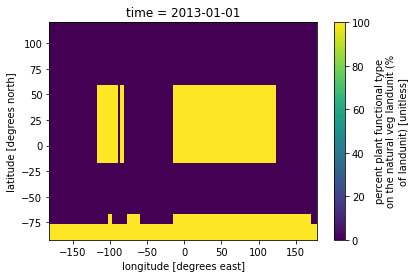

In [124]:
pfts2000.sum('natpft').where(pfts2012.sum('natpft')>0.).fillna(0.).plot()

In [5]:
# Have a look to the variables:
"""
if comp=='atm': model='cam'
elif comp=='lnd': model='clm2'
fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.h0.2007-01.nc'
all_files = glob.glob(fp)
all_files.sort()
print("Files found")
ds0 = xr.open_mfdataset(all_files)
print("Dataset created")
ds0
"""

Files found
Dataset created


<xarray.Dataset>
Dimensions:                  (cft: 64, glc_nec: 10, hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, ltype: 9, natpft: 15, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) datetime64[ns] 2007-02-01
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                   (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds              (time, hist_interval) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area                     (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landfrac                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landmask                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    pftmask                  (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    nbedrock                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    ZSOI                     (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    DZSOI                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    WATSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    SUCSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    BSW                      (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    HKSAT                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    ZLAKE                    (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    DZLAKE                   (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    ACTUAL_IMMOB             (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALT                      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALTMAX                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AR                       (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ATM_TOPO                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_CROP                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_PEATF                (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BCDEP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BTRAN2                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), m

In [4]:
# Estimate order of magnitude of the variables
"""
variables = sum([*variables_by_component(comp).values()], [])
d = ds0[variables]
for v in variables:
    print(d[v].long_name)
    print(d[v].mean('lon').mean('lat').values)
"""

isoprene surface flux
[1.7447018e-11]
monoterp surface flux
[4.3613533e-12]
Aerosol number concentration
[[1.9515255e-12 7.1730240e-11 2.3537656e-09 8.4998383e-08 2.9120256e-06
  7.0975613e-05 1.3095025e-03 2.3226814e-02 3.9300203e-01 2.2726414e+00
  5.3411889e+00 8.8569784e+00 1.3009904e+01 1.8338457e+01 2.5621515e+01
  3.4369640e+01 4.3129337e+01 5.0887222e+01 5.8681870e+01 6.8754349e+01
  8.5192169e+01 1.1184490e+02 1.5768916e+02 2.2544951e+02 2.9913400e+02
  3.6243982e+02 4.1962833e+02 4.7367758e+02 5.2166235e+02 5.7607697e+02
  6.3257501e+02 7.2666730e+02]]
Aerosol optical depth at 550nm
[0.10809896]
SOA_A1 concentration
[[5.4166921e-22 8.6581609e-21 1.3496359e-19 2.4662150e-18 5.4100659e-17
  9.3624119e-16 1.2821225e-14 1.7431647e-13 2.0331768e-12 1.1586320e-11
  2.9725594e-11 5.0290699e-11 7.1063468e-11 8.7363249e-11 9.6266051e-11
  9.9373100e-11 9.5885654e-11 8.7991676e-11 7.7973517e-11 6.9720334e-11
  6.5865674e-11 6.4867417e-11 7.3638477e-11 1.0045700e-10 1.2924699e-10
  1.51

In [3]:
ds0 = create_dataset(raw_path, casename, comp)
ds0

Files found
Dataset created
Postprocessing completed


In [5]:
ds_lnd = convert360_180(ds)
pfts2012 = ds_lnd.PCT_NAT_PFT.isel(time=-1)

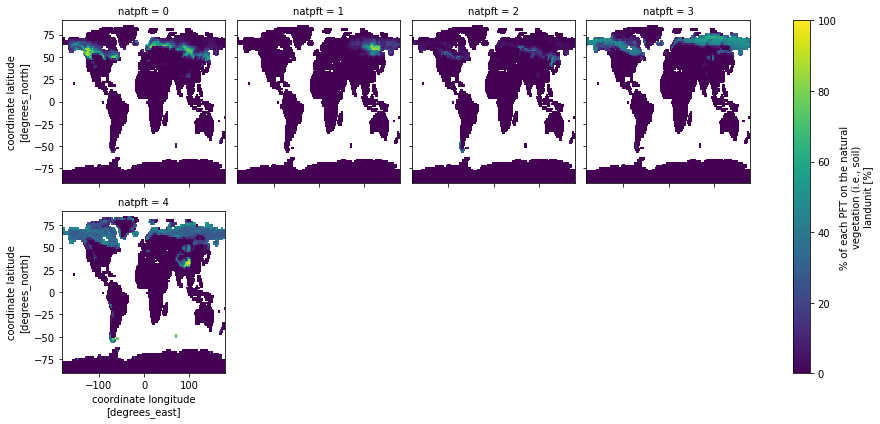

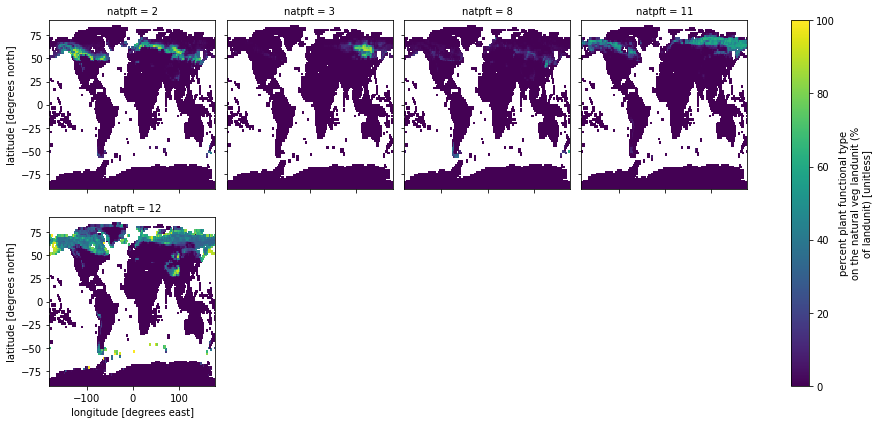

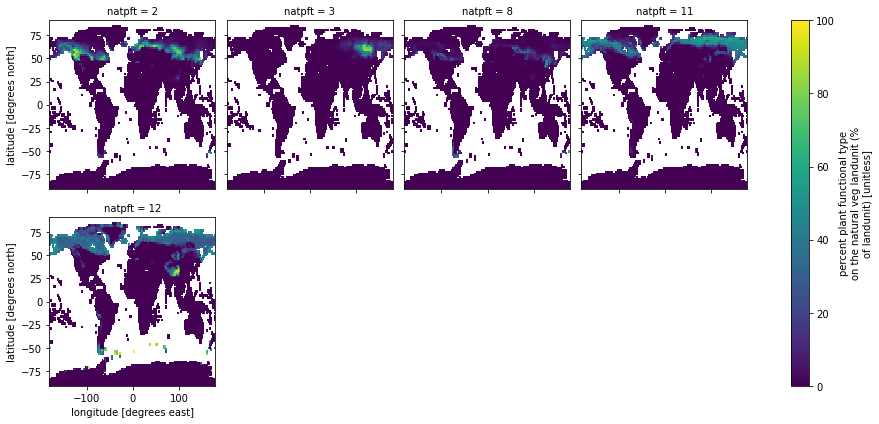

In [20]:
(pfts2012).sel(natpft=[2,3,8,11,12]).plot(col='natpft', col_wrap=4, vmax=100); plt.show()
(pfts2000_noedit).where(lnd_frac>0).sel(natpft=[2,3,8,11,12]).plot(col='natpft', col_wrap=4, vmax=100); plt.show()
(pfts2000_edit).where(lnd_frac>0).sel(natpft=[2,3,8,11,12]).plot(col='natpft', col_wrap=4, vmax=100); plt.show()

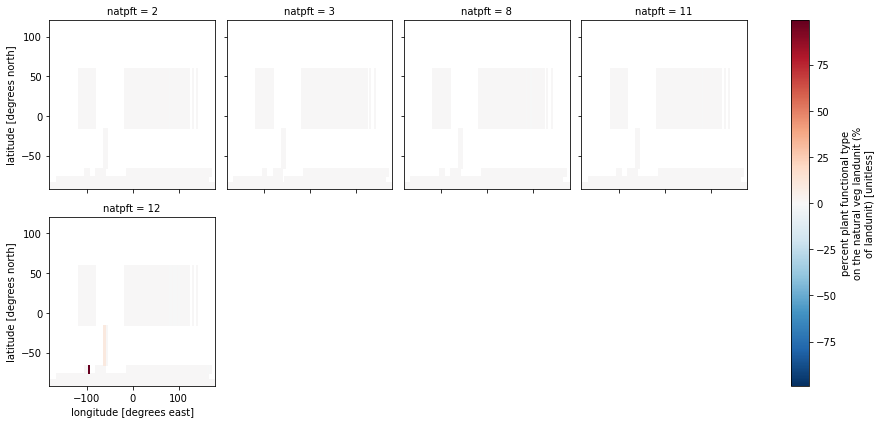

In [24]:
(pfts2000_edit-pfts2012.fillna(0.)).where(lnd_frac>0).sel(natpft=[2,3,8,11,12]).plot(col='natpft', col_wrap=4); plt.show()

In [45]:
pfts20122 = pfts2012.assign_coords({'natpft': pfts2012.natpft})

In [37]:
pfts2000_noedit

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 15, lat: 96, lon: 144)>
array([[[100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.],
        ...,
        [100., 100., ..., 100., 100.],
        [100., 100., ..., 100., 100.]],

       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ...,
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       ...,

       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ...,
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       [[  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.],
        ...,
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]]])
Coordinates:
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

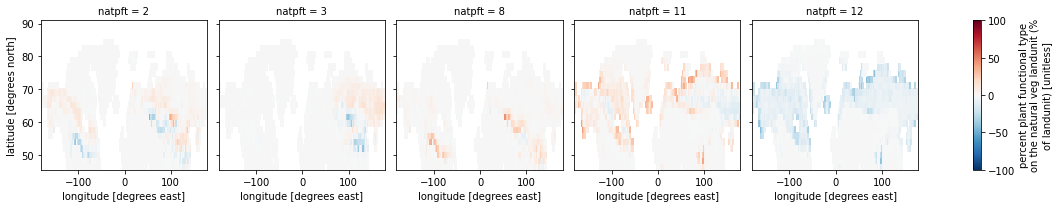

In [56]:
change = pfts2000_noedit.copy(deep=True)
change[:] = pfts20122.values - pfts2000_noedit.values
change.sel(natpft=[2,3,8,11,12]).where(change.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100)

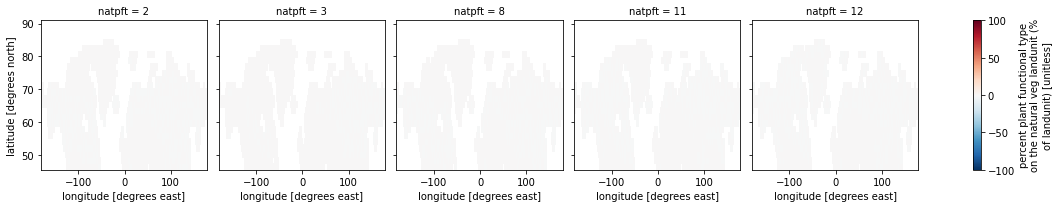

In [57]:
change = pfts2000_edit.copy(deep=True)
change[:] = pfts20122.values - pfts2000_edit.values
change.sel(natpft=[2,3,8,11,12]).where(change.lat>45., drop=True).plot(col='natpft', col_wrap=5, vmax=100)

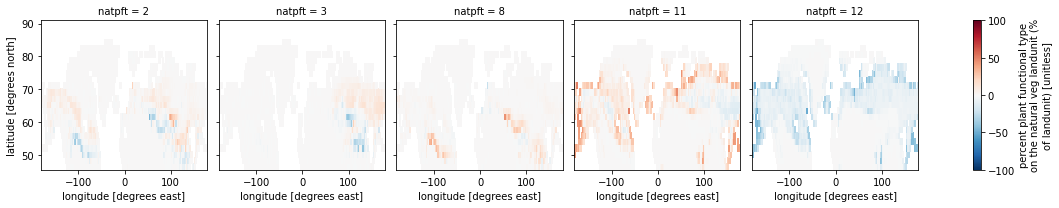

In [55]:
d = (pfts2000_edit-pfts2000_noedit).sel(natpft=[2,3,8,11,12]).where(pfts2000.lat>45., drop=True).where(lnd_frac>0.)
d.plot(col='natpft', col_wrap=5, vmax=100)

In [71]:
def basic_pft_map(da, title, extent_lat=45, figsize=None, col_wrap=None, cmap='Greens', contourf = False, titles = None, **kwargs):
    """Analogous plot of da.plot(col='natpft'), but prettier (coastlines, proper colormap...)""" #proj=ccrs.PlateCarree(),
    npft=len(da.natpft.values)
    if not col_wrap: col_wrap = npft
    
    # Gather all the arguments of the plot
    plot_args = dict(col='natpft', figsize=figsize, cmap=cmap, col_wrap=col_wrap, add_colorbar=False, **kwargs) #, transform=ccrs.PlateCarree(), subplot_kws={"projection": proj} 

    # If not plot.contourf -> plot.pcolormesh
    if not contourf: p = da.plot(**plot_args) #pcolormesh
    else: p = da.plot.contourf(**plot_args)

    for i, ax in enumerate(p.axes.flat):
        #ax_map_properties(ax, gridlines=False, rivers=False, borders=False)
        #ax.set_extent([-180,180, extent_lat,90])#, crs = ccrs.PlateCarree())
        #if col_wrap == npft: ax.set_position([0.025+i*(1/npft+0.01), 0.15, 1/npft, 0.66])
        if titles and i<len(titles): ax.set_title(titles[i])
            
        """
        if proj== ccrs.PlateCarree():
            ax.set_aspect('auto')
            ax.set_xticks(ax.get_xticks()[abs(ax.get_xticks())<=180])
            ax.set_yticks(ax.get_yticks()[abs(ax.get_yticks())<=90])
        """
    p.fig.subplots_adjust(left =0.04, right=1.04, wspace =0.03, hspace=0.2, bottom=0.15, top=0.85)

    p.add_colorbar()
    p.fig.suptitle(title, size=max(figsize)) if figsize else p.fig.suptitle(title)
    p.fig.tight_layout()
    plt.show()